In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline
 

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
import sklearn
sklearn.__version__

'1.2.1'

In [2]:
# Mengimport data output 'Data Preparation.ipynb'
data = pd.read_csv(r'../Hasil Proses Data/Data Preparation.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73143 entries, 0 to 73142
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   street       73143 non-null  object 
 1   level        73143 non-null  int64  
 2   precip       73143 non-null  float64
 3   Libur        73143 non-null  int64  
 4   day          73143 non-null  object 
 5   ROAD_CLOSED  73143 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.3+ MB


In [4]:
data.sample(6)

street  level  precip  Libur       day  ROAD_CLOSED
45981  Merah Delima 1      0   0.008      0  Thursday            0
4645      Asia Afrika      2   0.012      0   Tuesday            0
73011         Melania      0   2.148      0   Tuesday            0
29682  Jalan Ciwaregu      0  11.943      0  Thursday            0
70742  Kencana Arum 5      0   2.999      0    Sunday            0
12370        Tamblong      3   0.000      0    Monday            0

In [5]:
# Cek apakah masih ada missing value
data.isnull().sum()

street         0
level          0
precip         0
Libur          0
day            0
ROAD_CLOSED    0
dtype: int64

In [6]:
# Cek missing value dengan heatmap
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot: >

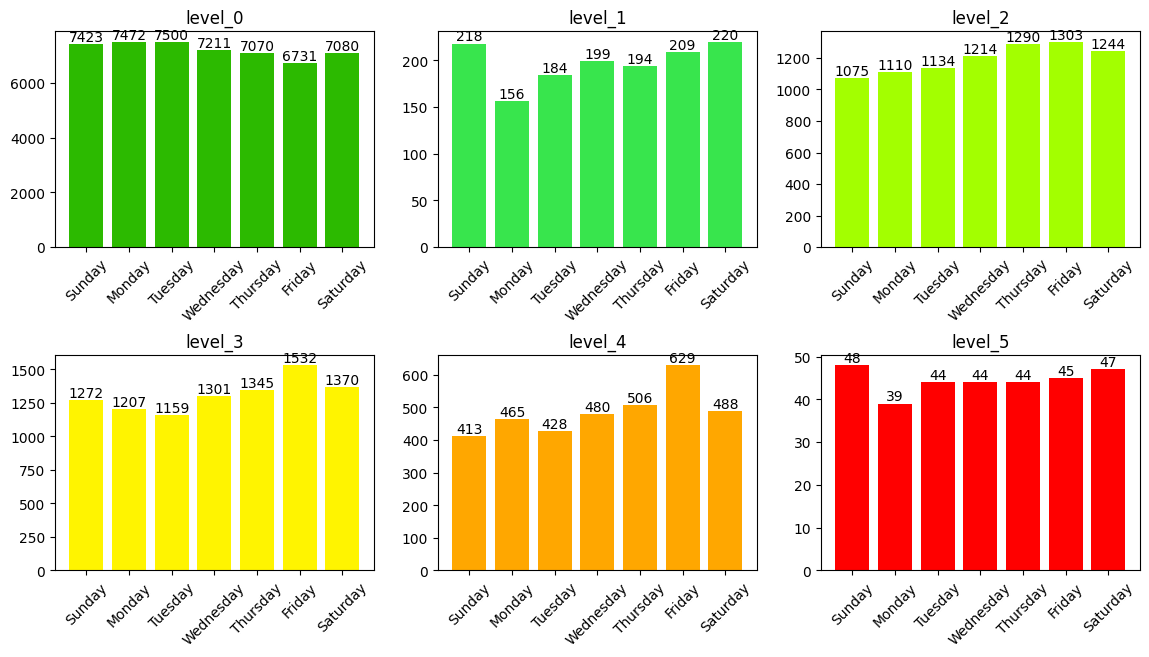

In [7]:
# Membuat grafik persebaran data 'day' pada setiap nilai 'level'
level_list = sorted(list(data['level'].unique()))

name_order = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday':5, 'Friday':6, 'Saturday':7}
data_bylevel1 = []

for level in level_list:
    level_data = data[data['level'] == level]
    data_name = 'level_' + str(level)

    level_data = level_data.groupby('day')['level'].count()
    level_data = level_data.reset_index()
    level_data.sort_values('day', key=lambda x: x.map(name_order), inplace=True)
    locals()[data_name] = level_data
    data_bylevel1.append(data_name)

fig, ax = plt.subplots(2, 3, figsize=(14, 7))
colors = ['#2cba00', '#38e54d', '#a3ff00', '#fff400', '#ffa700', '#ff0000']
count = 0

for a in range(2):
    for b in range(3):
        data_name = data_bylevel1[count]
        data_forplot = locals()[data_name]
        ax[a,b].bar(data_forplot.day, data_forplot.level, color = colors[count])
        ax[a,b].set_title(data_name)
        ax[a,b].set_xticklabels(ax[a,b].get_xticklabels(), rotation=45)
        for c, d in enumerate(data_forplot.level):
            ax[a,b].annotate(str(d), xy=(c, d), ha='center', va='bottom')
        count += 1


fig.subplots_adjust(hspace=0.5, wspace=0.2 )

In [8]:
# Membuat grafik jumlah data untuk setiap harinya
plt.figure(figsize=(7,5))

plt.bar(data.groupby('day')['level'].count().index, data.groupby('day')['level'].count().values)
plt.title('Distribusi Data "day"')
for c, d in enumerate(data.groupby('day')['level'].count().values):
    plt.annotate(str(d), xy=(c, d), ha='center', va='bottom')

In [9]:
# Nilai-nilai statistika pada data 'precip
data['precip'].describe()

count    73143.000000
mean         7.179730
std         25.947377
min          0.000000
25%          0.100000
50%          0.700000
75%          3.500000
max        198.896000
Name: precip, dtype: float64

<AxesSubplot: xlabel='precip'>

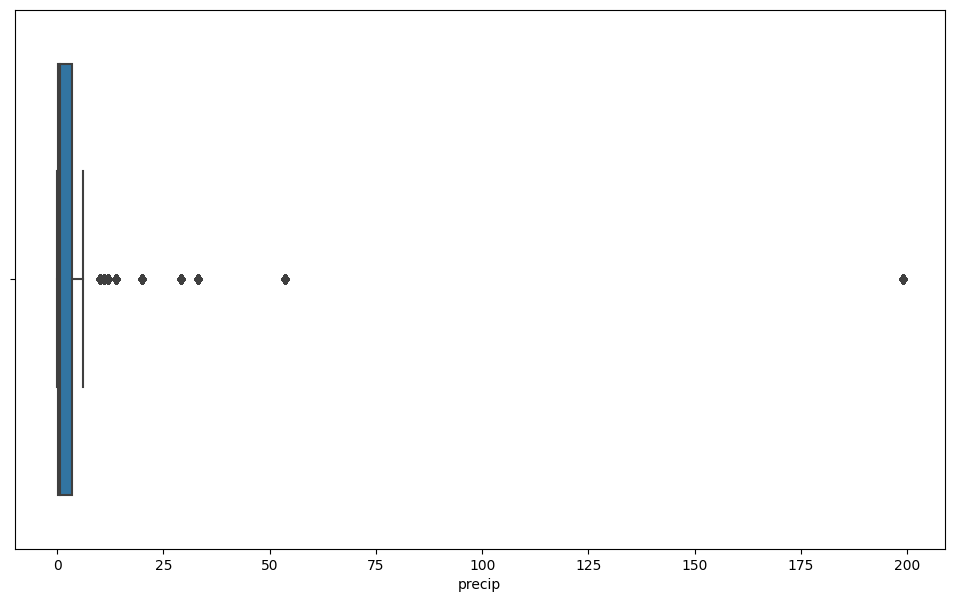

In [10]:
# Persebaran data 'precip'
plt.figure(figsize=(12,7))
sns.boxplot(x=data['precip'])

In [11]:
level_counts = data['level'].value_counts()
level_counts_percentage = data['level'].value_counts(normalize=True).round(3)

<Figure size 1200x700 with 0 Axes>

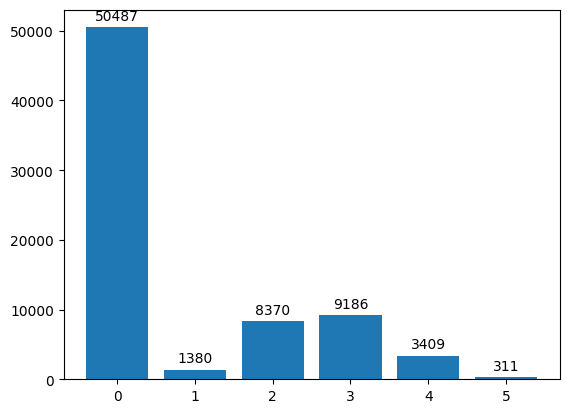

In [12]:
# Membuat barchart perbandingan jumlah data pada setiap label
plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(level_counts.index, level_counts.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

In [13]:
# Membuat barchart persentase data dari setiap label terhadap
# data keseluruhan
plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(level_counts_percentage.index, level_counts_percentage.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

<Figure size 1200x700 with 0 Axes>

## Encode Categorical Data

In [14]:
# Encode kolom 'day' menggunakan One Hot Encodeer
day_oh_encode = OneHotEncoder(sparse_output=False)
df_day = day_oh_encode.fit_transform(data[['day']])
df_day = pd.DataFrame(df_day)
df_day.columns = day_oh_encode.get_feature_names_out(['day'])

In [15]:
df_day.sample(6)

day_Friday  day_Monday  day_Saturday  day_Sunday  day_Thursday  \
30602         1.0         0.0           0.0         0.0           0.0   
9608          0.0         0.0           0.0         1.0           0.0   
53651         0.0         0.0           0.0         1.0           0.0   
21311         0.0         0.0           0.0         0.0           1.0   
37955         0.0         1.0           0.0         0.0           0.0   
27076         0.0         1.0           0.0         0.0           0.0   

       day_Tuesday  day_Wednesday  
30602          0.0            0.0  
9608           0.0            0.0  
53651          0.0            0.0  
21311          0.0            0.0  
37955          0.0            0.0  
27076          0.0            0.0

In [16]:
data.drop('day', axis=1, inplace=True)
data = pd.concat([data, df_day], axis=1)
data.sample(6)

street  level  precip  Libur  ROAD_CLOSED  day_Friday  \
7235           Lengkong Kecil      3   0.300      0            0         0.0   
3200   Jalan Raya Dayeuhkolot      2   4.068      0            0         1.0   
66579            Hariangbanga      0   0.994      0            0         0.0   
7068               Cikapayang      3   0.300      0            0         0.0   
38754             Cihaur Kuku      0   0.200      0            0         0.0   
25447            Jalan Ma Eja      0   0.300      0            0         0.0   

       day_Monday  day_Saturday  day_Sunday  day_Thursday  day_Tuesday  \
7235          1.0           0.0         0.0           0.0          0.0   
3200          0.0           0.0         0.0           0.0          0.0   
66579         0.0           0.0         0.0           0.0          1.0   
7068          1.0           0.0         0.0           0.0          0.0   
38754         0.0           0.0         0.0           0.0          1.0   
25447         0.0           1.0         0.0           0.0          0.0   

       day_Wednesday  
7235             0.0  
3200             0.0  
66579            0.0  
7068             0.0  
38754            0.0  
25447            0.0

Pada proses encode kolom 'street' akan dibagi menjadi dua, satu data akan menggunakan BinaryEncoder, dan satu data lainnya akan berupa OneHotEncoder

In [17]:
# Encode kolom 'street' dengan BinaryEncoder
street_binary_encode = ce.BinaryEncoder()
street_binary = street_binary_encode.fit_transform(data['street'])

street_binary.sample(6)

KeyboardInterrupt: 

In [ ]:
data_binaryencode = pd.concat([data, street_binary], axis=1)
data_binaryencode.head(6)

street  level  precip  Libur  ROAD_CLOSED  day_Friday  \
0  Abdul Rahman Saleh      2   1.134      0            0         0.0   
1   Akses Tol Pasteur      3   1.134      0            0         0.0   
2            Alkateri      2   1.134      0            0         0.0   
3     Alun-alun Timur      3   1.134      0            0         0.0   
4             Anggrek      4   1.134      0            0         0.0   
5            Antapani      2   1.134      0            0         0.0   

   day_Monday  day_Saturday  day_Sunday  day_Thursday  ...  street_1  \
0         0.0           0.0         0.0           0.0  ...         0   
1         0.0           0.0         0.0           0.0  ...         0   
2         0.0           0.0         0.0           0.0  ...         0   
3         0.0           0.0         0.0           0.0  ...         0   
4         0.0           0.0         0.0           0.0  ...         0   
5         0.0           0.0         0.0           0.0  ...         0   

   street_2  street_3  street_4  street_5  street_6  street_7  street_8  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         1   
4         0         0         0         0         0         0         1   
5         0         0         0         0         0         0         1   

   street_9  street_10  
0         0          1  
1         1          0  
2         1          1  
3         0          0  
4         0          1  
5         1          0  

[6 rows x 23 columns]

In [ ]:
# Encode kolom 'street' dengan OneHotEncoder
street_oh_encode = OneHotEncoder(sparse_output=False)
df_street = day_oh_encode.fit_transform(data[['street']])
df_street = pd.DataFrame(df_street)
df_street.columns = day_oh_encode.get_feature_names_out(['street'])

In [ ]:
df_street

street_Abadi 1  street_Abadi Raya  street_Abadi Regency  \
0                 0.0                0.0                   0.0   
1                 0.0                0.0                   0.0   
2                 0.0                0.0                   0.0   
3                 0.0                0.0                   0.0   
4                 0.0                0.0                   0.0   
...               ...                ...                   ...   
73138             0.0                0.0                   0.0   
73139             0.0                0.0                   0.0   
73140             0.0                0.0                   0.0   
73141             0.0                0.0                   0.0   
73142             0.0                0.0                   0.0   

       street_Abdul Halim  street_Abdul Rahman Saleh  street_Adi Flora Raya  \
0                     0.0                        1.0                    0.0   
1                     0.0                        0.0                    0.0   
2                     0.0                        0.0                    0.0   
3                     0.0                        0.0                    0.0   
4                     0.0                        0.0                    0.0   
...                   ...                        ...                    ...   
73138                 0.0                        0.0                    0.0   
73139                 0.0                        0.0                    0.0   
73140                 0.0                        0.0                    0.0   
73141                 0.0                        0.0                    0.0   
73142                 0.0                        0.0                    0.0   

       street_Adiyaksa - Terusan Buah Batu  street_Aeromodeling  \
0                                      0.0                  0.0   
1                                      0.0                  0.0   
2                                      0.0                  0.0   
3                                      0.0                  0.0   
4                                      0.0                  0.0   
...                                    ...                  ...   
73138                                  0.0                  0.0   
73139                                  0.0                  0.0   
73140                                  0.0                  0.0   
73141                                  0.0                  0.0   
73142                                  0.0                  0.0   

       street_Aeromodeling 4  street_Ajudan Jenderal  ...  \
0                        0.0                     0.0  ...   
1                        0.0                     0.0  ...   
2                        0.0                     0.0  ...   
3                        0.0                     0.0  ...   
4                        0.0                     0.0  ...   
...                      ...                     ...  ...   
73138                    0.0                     0.0  ...   
73139                    0.0                     0.0  ...   
73140                    0.0                     0.0  ...   
73141                    0.0                     0.0  ...   
73142                    0.0                     0.0  ...   

       street_Wastukencana  street_Wayang  street_Westhoff  \
0                      0.0            0.0              0.0   
1                      0.0            0.0              0.0   
2                      0.0            0.0              0.0   
3                      0.0            0.0              0.0   
4                      0.0            0.0              0.0   
...                    ...            ...              ...   
73138                  0.0            0.0              0.0   
73139                  0.0            0.0              0.0   
73140                  0.0            0.0              0.0   
73141                  0.0            0.0              0.0   
73142                  0.0            0.0    

In [ ]:
data_oh_encode = pd.concat([data, df_street], axis=1)
data_oh_encode.sample(6)

street  level  precip  Libur  ROAD_CLOSED  day_Friday  \
47868  De' Marrakesh      0   0.631      0            0         0.0   
62898    Sindangsari      0   0.200      0            0         0.0   
30346     Budi Luhur      0   4.068      0            0         1.0   
67673    Pasir Subur      0   3.500      0            0         0.0   
63736  Terjun Tandom      0   0.995      0            0         1.0   
65237    Silverstone      0   0.010      0            0         0.0   

       day_Monday  day_Saturday  day_Sunday  day_Thursday  ...  \
47868         0.0           1.0         0.0           0.0  ...   
62898         0.0           0.0         0.0           1.0  ...   
30346         0.0           0.0         0.0           0.0  ...   
67673         0.0           0.0         0.0           0.0  ...   
63736         0.0           0.0         0.0           0.0  ...   
65237         0.0           0.0         1.0           0.0  ...   

       street_Wastukencana  street_Wayang  street_Westhoff  \
47868                  0.0            0.0              0.0   
62898                  0.0            0.0              0.0   
30346                  0.0            0.0              0.0   
67673                  0.0            0.0              0.0   
63736                  0.0            0.0              0.0   
65237                  0.0            0.0              0.0   

       street_Wijayakusumah  street_Windu  street_Wira Angun-angun  \
47868                   0.0           0.0                      0.0   
62898                   0.0           0.0                      0.0   
30346                   0.0           0.0                      0.0   
67673                   0.0           0.0                      0.0   
63736                   0.0           0.0                      0.0   
65237                   0.0           0.0                      0.0   

       street_Yakin  street_Yuda  street_Yudawastu Pramuka 4  \
47868           0.0          0.0                         0.0   
62898           0.0          0.0                         0.0   
30346           0.0          0.0                         0.0   
67673           0.0          0.0                         0.0   
63736           0.0          0.0                         0.0   
65237           0.0          0.0                         0.0   

       street_de' Elgran Residence  
47868                          0.0  
62898                          0.0  
30346                          0.0  
67673                          0.0  
63736                          0.0  
65237                          0.0  

[6 rows x 1173 columns]

In [ ]:
# Menghapus kolom 'street' pada kedua data
# Kolom 'street' sudah di encode sehingga tidak dibutuhkan
data_oh_encode.drop('street', axis=1, inplace=True)
data_binaryencode.drop('street', axis=1, inplace=True)

In [ ]:
# Memisahkan features dan label
x_oh_encode = data_oh_encode.drop('level', axis=1)
y_oh_encode = data_oh_encode.level

# Split data train dan test dengan perbandingan 7:3
x_train_oh, x_test_oh, y_train_oh, y_test_oh =  train_test_split(x_oh_encode, y_oh_encode, test_size = 0.3, random_state = 123)

# Melakukan hal yang sama terhadap data_binaryencode
x_binaryencode = data_binaryencode.drop('level', axis=1)
y_binaryencode = data_binaryencode.level

x_train_be, x_test_be, y_train_be, y_test_be =  train_test_split(x_binaryencode, y_binaryencode, test_size = 0.3, random_state = 123)

In [ ]:
# Karena menggunakan random_state yang sama
# maka kedua data mempunyai hasil split yang sama
y_test_be.equals(y_test_oh)

True

<Figure size 1200x700 with 0 Axes>

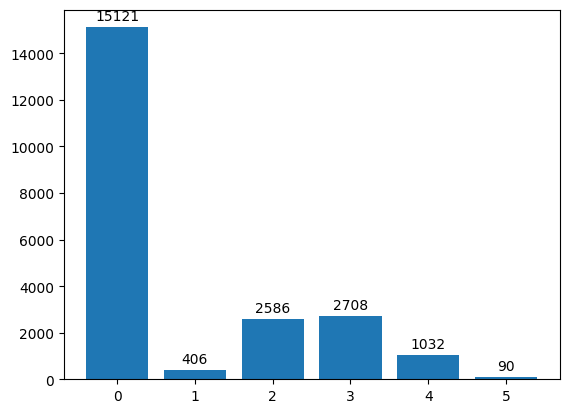

In [ ]:
y_test_counts = y_test_oh.value_counts()

plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(y_test_counts.index, y_test_counts.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

<Figure size 1200x700 with 0 Axes>

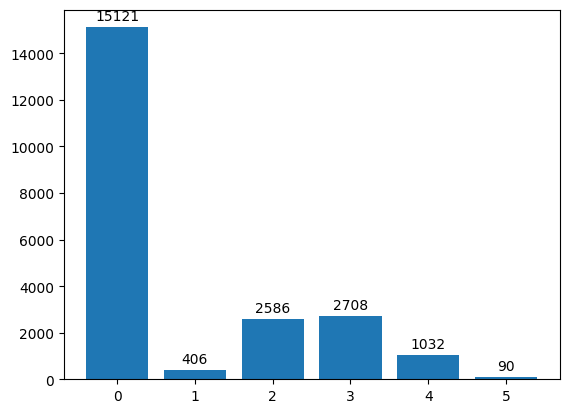

In [ ]:
y_test_counts = y_test_be.value_counts()

plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(y_test_counts.index, y_test_counts.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

<Figure size 1200x700 with 0 Axes>

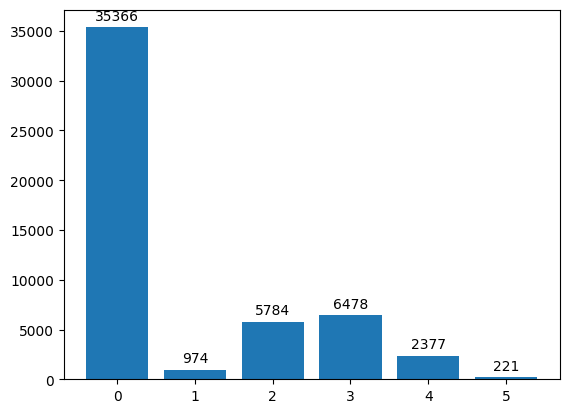

In [ ]:
y_train_counts = y_train_be.value_counts()

plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(y_train_counts.index, y_train_counts.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

## Data Scaling

Pada proses scaling akan dibagi menjadi dua, sehingga akan terdapat data dengan MinMaxScaler dan StandardScaler. 

### MinMaxScaler

In [ ]:
# Scaling dengan MinMaxScaler
scaler_for_binary = MinMaxScaler()
x_scaled_minmax_be = scaler_for_binary.fit_transform(x_train_be)
x_train_minmax_be = pd.DataFrame(x_scaled_minmax_be, columns=x_train_be.columns)

scaler_for_oh = MinMaxScaler()
x_scaled_minmax_oh = scaler_for_oh.fit_transform(x_train_oh)
x_train_minmax_oh = pd.DataFrame(x_scaled_minmax_oh, columns=x_train_oh.columns)

In [ ]:
x_train_minmax_be.head(2)

precip  Libur  ROAD_CLOSED  day_Friday  day_Monday  day_Saturday  \
0  0.000503    0.0          0.0         0.0         0.0           0.0   
1  0.001508    0.0          0.0         0.0         1.0           0.0   

   day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  street_1  \
0         0.0           0.0          0.0            1.0  ...       0.0   
1         0.0           0.0          0.0            0.0  ...       0.0   

   street_2  street_3  street_4  street_5  street_6  street_7  street_8  \
0       0.0       1.0       1.0       0.0       0.0       1.0       0.0   
1       0.0       1.0       1.0       1.0       0.0       1.0       0.0   

   street_9  street_10  
0       0.0        0.0  
1       0.0        0.0  

[2 rows x 21 columns]

In [ ]:
x_train_minmax_oh.head(2)

precip  Libur  ROAD_CLOSED  day_Friday  day_Monday  day_Saturday  \
0  0.000503    0.0          0.0         0.0         0.0           0.0   
1  0.001508    0.0          0.0         0.0         1.0           0.0   

   day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  \
0         0.0           0.0          0.0            1.0  ...   
1         0.0           0.0          0.0            0.0  ...   

   street_Wastukencana  street_Wayang  street_Westhoff  street_Wijayakusumah  \
0                  0.0            0.0              0.0                   0.0   
1                  0.0            0.0              0.0                   0.0   

   street_Windu  street_Wira Angun-angun  street_Yakin  street_Yuda  \
0           0.0                      0.0           0.0          0.0   
1           0.0                      0.0           0.0          0.0   

   street_Yudawastu Pramuka 4  street_de' Elgran Residence  
0                         0.0                          0.0  
1                         0.0                          0.0  

[2 rows x 1171 columns]

In [ ]:
# Saat scaling index akan reset,
# Reset index untuk y_train untuk menghindari error saat concat data
y_train_be = y_train_be.reset_index()
y_train_be = y_train_be.drop('index', axis=1)
y_train_be.head()

y_train_oh = y_train_oh.reset_index()
y_train_oh = y_train_oh.drop('index', axis=1)
y_train_oh.head()

level
0      4
1      4
2      0
3      4
4      2

In [ ]:
# Scaling data test menggunakan scaler dari data train
x_test_scaled_minmax_be = scaler_for_binary.transform(x_test_be)
x_test_minmax_be = pd.DataFrame(x_test_scaled_minmax_be, columns=x_test_be.columns)

x_test_scaled_minmax_oh = scaler_for_oh.transform(x_test_oh)
x_test_minmax_oh = pd.DataFrame(x_test_scaled_minmax_oh, columns=x_test_oh.columns)

In [ ]:
x_test_minmax_be.head(3)

precip  Libur  ROAD_CLOSED  day_Friday  day_Monday  day_Saturday  \
0  0.003519    1.0          0.0         0.0         0.0           0.0   
1  0.030755    0.0          0.0         0.0         0.0           0.0   
2  0.000503    0.0          0.0         0.0         0.0           0.0   

   day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  street_1  \
0         1.0           0.0          0.0            0.0  ...       0.0   
1         0.0           0.0          0.0            1.0  ...       1.0   
2         0.0           1.0          0.0            0.0  ...       0.0   

   street_2  street_3  street_4  street_5  street_6  street_7  street_8  \
0       1.0       0.0       0.0       0.0       0.0       1.0       1.0   
1       1.0       0.0       0.0       1.0       0.0       0.0       1.0   
2       1.0       0.0       1.0       0.0       0.0       1.0       1.0   

   street_9  street_10  
0       0.0        1.0  
1       1.0        1.0  
2       0.0        1.0  

[3 rows x 21 columns]

In [ ]:
x_test_minmax_oh.head(3)

precip  Libur  ROAD_CLOSED  day_Friday  day_Monday  day_Saturday  \
0  0.003519    1.0          0.0         0.0         0.0           0.0   
1  0.030755    0.0          0.0         0.0         0.0           0.0   
2  0.000503    0.0          0.0         0.0         0.0           0.0   

   day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  \
0         1.0           0.0          0.0            0.0  ...   
1         0.0           0.0          0.0            1.0  ...   
2         0.0           1.0          0.0            0.0  ...   

   street_Wastukencana  street_Wayang  street_Westhoff  street_Wijayakusumah  \
0                  0.0            0.0              0.0                   0.0   
1                  0.0            0.0              0.0                   0.0   
2                  0.0            0.0              0.0                   0.0   

   street_Windu  street_Wira Angun-angun  street_Yakin  street_Yuda  \
0           0.0                      0.0           0.0          0.0   
1           0.0                      0.0           0.0          0.0   
2           0.0                      0.0           0.0          0.0   

   street_Yudawastu Pramuka 4  street_de' Elgran Residence  
0                         0.0                          0.0  
1                         0.0                          0.0  
2                         0.0                          0.0  

[3 rows x 1171 columns]

In [ ]:
# Saat scaling index akan reset,
# Reset index untuk y_test untuk menghindari error saat concat data
y_test_be = y_test_be.reset_index()
y_test_be = y_test_be.drop('index', axis=1)
y_test_be.head()

y_test_oh = y_test_oh.reset_index()
y_test_oh = y_test_oh.drop('index', axis=1)
y_test_oh.head()

level
0      0
1      0
2      2
3      0
4      2

### StandardScaler

In [ ]:
# Scaling dengan StandardScaler
standardscaler_for_binary = StandardScaler()
x_scaled_standard_be = standardscaler_for_binary.fit_transform(x_train_be)
x_train_standard_be = pd.DataFrame(x_scaled_standard_be, columns=x_train_be.columns)

standardscaler_for_oh = StandardScaler()
x_scaled_standard_oh = standardscaler_for_oh.fit_transform(x_train_oh)
x_train_standard_oh = pd.DataFrame(x_scaled_standard_oh, columns=x_train_oh.columns)


In [ ]:
x_train_standard_be.head(2)

precip     Libur  ROAD_CLOSED  day_Friday  day_Monday  day_Saturday  \
0 -0.272347 -0.223265    -0.066881    -0.40902   -0.405794      -0.40954   
1 -0.264581 -0.223265    -0.066881    -0.40902    2.464305      -0.40954   

   day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  street_1  \
0   -0.409085     -0.407522    -0.408532       2.449546  ... -0.890382   
1   -0.409085     -0.407522    -0.408532      -0.408239  ... -0.890382   

   street_2  street_3  street_4  street_5  street_6  street_7  street_8  \
0 -0.886265  1.105498  1.007528 -0.995596  -0.99311  1.004149 -0.998166   
1 -0.886265  1.105498  1.007528  1.004424  -0.99311  1.004149 -0.998166   

   street_9  street_10  
0 -1.003287  -1.003757  
1 -1.003287  -1.003757  

[2 rows x 21 columns]

In [ ]:
x_train_standard_oh.head(2)

precip     Libur  ROAD_CLOSED  day_Friday  day_Monday  day_Saturday  \
0 -0.272347 -0.223265    -0.066881    -0.40902   -0.405794      -0.40954   
1 -0.264581 -0.223265    -0.066881    -0.40902    2.464305      -0.40954   

   day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  \
0   -0.409085     -0.407522    -0.408532       2.449546  ...   
1   -0.409085     -0.407522    -0.408532      -0.408239  ...   

   street_Wastukencana  street_Wayang  street_Westhoff  street_Wijayakusumah  \
0            -0.029328      -0.031885        -0.031577             -0.028653   
1            -0.029328      -0.031885        -0.031577             -0.028653   

   street_Windu  street_Wira Angun-angun  street_Yakin  street_Yuda  \
0     -0.029659                -0.029659     -0.028309    -0.030633   
1     -0.029659                -0.029659     -0.028309    -0.030633   

   street_Yudawastu Pramuka 4  street_de' Elgran Residence  
0                    -0.02761                    -0.030633  
1                    -0.02761                    -0.030633  

[2 rows x 1171 columns]

In [ ]:
# Scaling data test menggunakan scaler dari data train
x_test_scaled_standard_be = standardscaler_for_binary.transform(x_test_be)
x_test_standard_be = pd.DataFrame(x_test_scaled_standard_be, columns=x_test_be.columns)

x_test_scaled_standard_oh = standardscaler_for_oh.transform(x_test_oh)
x_test_standard_oh = pd.DataFrame(x_test_scaled_standard_oh, columns=x_test_oh.columns)

In [ ]:
x_test_standard_be.head(3)

precip     Libur  ROAD_CLOSED  day_Friday  day_Monday  day_Saturday  \
0 -0.249049  4.478983    -0.066881    -0.40902   -0.405794      -0.40954   
1 -0.038710 -0.223265    -0.066881    -0.40902   -0.405794      -0.40954   
2 -0.272347 -0.223265    -0.066881    -0.40902   -0.405794      -0.40954   

   day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  street_1  \
0    2.444479     -0.407522    -0.408532      -0.408239  ... -0.890382   
1   -0.409085     -0.407522    -0.408532       2.449546  ...  1.123114   
2   -0.409085      2.453853    -0.408532      -0.408239  ... -0.890382   

   street_2  street_3  street_4  street_5  street_6  street_7  street_8  \
0  1.128331  -0.90457 -0.992528 -0.995596  -0.99311  1.004149  1.001838   
1  1.128331  -0.90457 -0.992528  1.004424  -0.99311 -0.995868  1.001838   
2  1.128331  -0.90457  1.007528 -0.995596  -0.99311  1.004149  1.001838   

   street_9  street_10  
0 -1.003287   0.996257  
1  0.996724   0.996257  
2 -1.003287   0.996257  

[3 rows x 21 columns]

In [ ]:
x_test_standard_oh.head(3)

precip     Libur  ROAD_CLOSED  day_Friday  day_Monday  day_Saturday  \
0 -0.249049  4.478983    -0.066881    -0.40902   -0.405794      -0.40954   
1 -0.038710 -0.223265    -0.066881    -0.40902   -0.405794      -0.40954   
2 -0.272347 -0.223265    -0.066881    -0.40902   -0.405794      -0.40954   

   day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  \
0    2.444479     -0.407522    -0.408532      -0.408239  ...   
1   -0.409085     -0.407522    -0.408532       2.449546  ...   
2   -0.409085      2.453853    -0.408532      -0.408239  ...   

   street_Wastukencana  street_Wayang  street_Westhoff  street_Wijayakusumah  \
0            -0.029328      -0.031885        -0.031577             -0.028653   
1            -0.029328      -0.031885        -0.031577             -0.028653   
2            -0.029328      -0.031885        -0.031577             -0.028653   

   street_Windu  street_Wira Angun-angun  street_Yakin  street_Yuda  \
0     -0.029659                -0.029659     -0.028309    -0.030633   
1     -0.029659                -0.029659     -0.028309    -0.030633   
2     -0.029659                -0.029659     -0.028309    -0.030633   

   street_Yudawastu Pramuka 4  street_de' Elgran Residence  
0                    -0.02761                    -0.030633  
1                    -0.02761                    -0.030633  
2                    -0.02761                    -0.030633  

[3 rows x 1171 columns]

## Handling Data Imbalance 

Untuk mengatasi data imbalance, akan menggunakan 2 cara kombinasi. Yaitu SMOTE-Tomek dan SMOTE-ENN

### SMOTE-TOMEK

In [ ]:
# I'll use combination of SMOTE for Oversampler and Tomek-Link as Undersampler

# Define the SMOTE-Tomek resampler
smt_minmax_be = SMOTETomek(random_state=42)
smt_minmax_oh = SMOTETomek(random_state=42)
smt_standard_be = SMOTETomek(random_state=42)
smt_standard_oh = SMOTETomek(random_state=42)

# Apply the resampler to the dataset
X_smt_minmax_be, y_smt_minmax_be = smt_minmax_be.fit_resample(x_train_minmax_be, y_train_be['level'])
X_smt_minmax_oh, y_smt_minmax_oh = smt_minmax_oh.fit_resample(x_train_minmax_oh, y_train_oh['level'])
X_smt_standard_be, y_smt_standard_be = smt_standard_be.fit_resample(x_train_standard_be, y_train_be['level'])
X_smt_standard_oh, y_smt_standard_oh = smt_standard_oh.fit_resample(x_train_standard_be, y_train_be['level'])

In [ ]:
X_smt_minmax_be.head(3)

precip  Libur  ROAD_CLOSED  day_Friday  day_Monday  day_Saturday  \
0  0.000503    0.0          0.0         0.0         0.0           0.0   
1  0.001508    0.0          0.0         0.0         1.0           0.0   
2  0.000503    0.0          0.0         0.0         0.0           0.0   
3  0.000277    1.0          0.0         0.0         0.0           0.0   
4  0.005003    0.0          0.0         1.0         0.0           0.0   
5  0.030755    0.0          0.0         0.0         0.0           0.0   

   day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  street_1  \
0         0.0           0.0          0.0            1.0  ...       0.0   
1         0.0           0.0          0.0            0.0  ...       0.0   
2         0.0           0.0          0.0            1.0  ...       0.0   
3         0.0           0.0          0.0            1.0  ...       0.0   
4         0.0           0.0          0.0            0.0  ...       1.0   
5         0.0           0.0          0.0            1.0  ...       0.0   

   street_2  street_3  street_4  street_5  street_6  street_7  street_8  \
0       0.0       1.0       1.0       0.0       0.0       1.0       0.0   
1       0.0       1.0       1.0       1.0       0.0       1.0       0.0   
2       0.0       0.0       1.0       1.0       0.0       1.0       1.0   
3       1.0       0.0       1.0       0.0       0.0       0.0       1.0   
4       0.0       0.0       0.0       1.0       0.0       0.0       1.0   
5       0.0       1.0       0.0       0.0       0.0       0.0       0.0   

   street_9  street_10  
0       0.0        0.0  
1       0.0        0.0  
2       0.0        0.0  
3       1.0        1.0  
4       1.0        1.0  
5       0.0        1.0  

[6 rows x 21 columns]

In [ ]:
X_smt_minmax_oh.head(3)

In [ ]:
X_smt_standard_be.head(3)

In [ ]:
X_smt_standard_oh.head(3)

In [ ]:
y_resampled_counts = y_smt_minmax_be.value_counts()

plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(y_resampled_counts.index, y_resampled_counts.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

<Figure size 1200x700 with 0 Axes>

In [ ]:
y_resampled_counts = y_smt_minmax_oh.value_counts()

plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(y_resampled_counts.index, y_resampled_counts.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

In [ ]:
y_resampled_counts = y_smt_standard_be.value_counts()

plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(y_resampled_counts.index, y_resampled_counts.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

In [ ]:
y_resampled_counts = y_smt_standard_oh.value_counts()

plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(y_resampled_counts.index, y_resampled_counts.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

### SMOTE-ENN

In [ ]:
# Define the SMOTE-Tomek resampler
sme_minmax_be = SMOTEENN(random_state=42)
sme_minmax_oh = SMOTEENN(random_state=42)
sme_standard_be = SMOTEENN(random_state=42)
sme_standard_oh = SMOTEENN(random_state=42)

# Apply the resampler to the dataset
X_sme_minmax_be, y_sme_minmax_be = sme_minmax_be.fit_resample(x_train_minmax_be, y_train_be['level'])
X_sme_minmax_oh, y_sme_minmax_oh = sme_minmax_oh.fit_resample(x_train_minmax_oh, y_train_oh['level'])
X_sme_standard_be, y_sme_standard_be = sme_standard_be.fit_resample(x_train_standard_be, y_train_be['level'])
X_sme_standard_oh, y_sme_standard_oh = sme_standard_oh.fit_resample(x_train_standard_be, y_train_be['level'])


In [ ]:
X_sme_minmax_be.head(3)

precip  Libur  ROAD_CLOSED  day_Friday  day_Monday  day_Saturday  \
0       0.030755    0.0          0.0         0.0         0.0           0.0   
1       0.030755    0.0          0.0         0.0         0.0           0.0   
2       0.003519    0.0          0.0         0.0         0.0           0.0   
3       0.004002    0.0          0.0         1.0         0.0           0.0   
4       0.000025    0.0          0.0         0.0         0.0           0.0   
...          ...    ...          ...         ...         ...           ...   
163045  0.001817    0.0          1.0         0.0         0.0           0.0   
163046  0.002033    0.0          1.0         0.0         0.0           0.0   
163047  0.008345    0.0          1.0         0.0         0.0           0.0   
163048  0.046027    0.0          1.0         1.0         0.0           0.0   
163049  0.029343    0.0          1.0         0.0         0.0           0.0   

        day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  street_1  \
0              0.0           0.0          0.0            1.0  ...       0.0   
1              0.0           0.0          0.0            1.0  ...       1.0   
2              0.0           1.0          0.0            0.0  ...       1.0   
3              0.0           0.0          0.0            0.0  ...       1.0   
4              1.0           0.0          0.0            0.0  ...       1.0   
...            ...           ...          ...            ...  ...       ...   
163045         0.0           1.0          0.0            0.0  ...       0.0   
163046         0.0           1.0          0.0            0.0  ...       0.0   
163047         0.0           0.0          0.0            1.0  ...       0.0   
163048         0.0           0.0          0.0            0.0  ...       0.0   
163049         1.0           0.0          0.0            0.0  ...       0.0   

        street_2  street_3  street_4  street_5  street_6  street_7  street_8  \
0       0.000000  1.000000       0.0       0.0       0.0       0.0       0.0   
1       1.000000  1.000000       1.0       1.0       1.0       1.0       1.0   
2       0.000000  0.000000       0.0       1.0       1.0       1.0       0.0   
3       0.000000  0.000000       0.0       0.0       1.0       1.0       0.0   
4       1.000000  1.000000       1.0       1.0       0.0       1.0       0.0   
...          ...       ...       ...       ...       ...       ...       ...   
163045  0.000000  1.000000       1.0       1.0       0.0       1.0       0.0   
163046  0.000000  1.000000       1.0       1.0       0.0       1.0       0.0   
163047  0.143438  0.856562       1.0       0.0       1.0       0.0       0.0   
163048  0.000000  1.000000       1.0       0.0       1.0       0.0       0.0   
163049  0.000000  0.000000       1.0       1.0       1.0       0.0       0.0   

        street_9  street_10  
0            0.0        1.0  
1            1.0        1.0  
2            0.0        0.0  
3            1.0        1.0  
4            1.0        0.0  
...          ...        ...  
163045       1.0        0.0  
163046       1.0        0.0  
163047       1.0        1.0  
163048       1.0        1.0  
163049       0.0        0.0  

[163050 rows x 21 columns]

In [ ]:
X_sme_minmax_oh.head(3)

In [ ]:
X_sme_standard_be.head(3)

In [ ]:
X_sme_standard_oh.head(3)

<Figure size 1200x700 with 0 Axes>

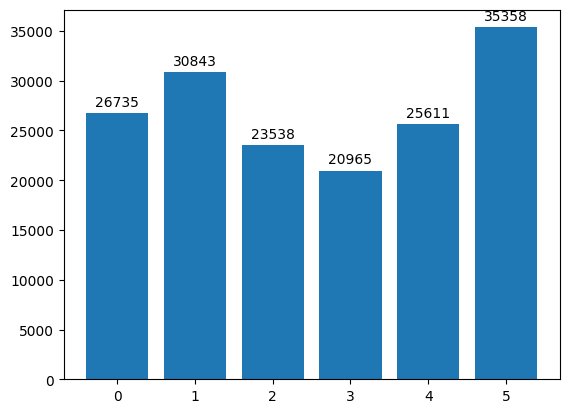

In [ ]:
y_resampled_counts = y_sme_minmax_be.value_counts()

plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(y_resampled_counts.index, y_resampled_counts.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

In [ ]:
y_resampled_counts = y_sme_minmax_oh.value_counts()

plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(y_resampled_counts.index, y_resampled_counts.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

In [ ]:
y_resampled_counts = y_sme_standard_be.value_counts()

plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(y_resampled_counts.index, y_resampled_counts.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

In [ ]:
y_resampled_counts = y_sme_standard_oh.value_counts()

plt.figure(figsize=(12,7))

fig, ax = plt.subplots()
rects = ax.bar(y_resampled_counts.index, y_resampled_counts.values)

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

## Output Data

In [ ]:
data_smt_minmax_be = X_smt_minmax_be
data_smt_minmax_be['level'] = y_smt_minmax_be
data_smt_minmax_be.head(3)

precip  Libur  ROAD_CLOSED  day_Friday  day_Monday  day_Saturday  \
0  0.000503    0.0          0.0         0.0         0.0           0.0   
1  0.001508    0.0          0.0         0.0         1.0           0.0   
2  0.000503    0.0          0.0         0.0         0.0           0.0   
3  0.000277    1.0          0.0         0.0         0.0           0.0   
4  0.005003    0.0          0.0         1.0         0.0           0.0   
5  0.030755    0.0          0.0         0.0         0.0           0.0   

   day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  street_2  \
0         0.0           0.0          0.0            1.0  ...       0.0   
1         0.0           0.0          0.0            0.0  ...       0.0   
2         0.0           0.0          0.0            1.0  ...       0.0   
3         0.0           0.0          0.0            1.0  ...       1.0   
4         0.0           0.0          0.0            0.0  ...       0.0   
5         0.0           0.0          0.0            1.0  ...       0.0   

   street_3  street_4  street_5  street_6  street_7  street_8  street_9  \
0       1.0       1.0       0.0       0.0       1.0       0.0       0.0   
1       1.0       1.0       1.0       0.0       1.0       0.0       0.0   
2       0.0       1.0       1.0       0.0       1.0       1.0       0.0   
3       0.0       1.0       0.0       0.0       0.0       1.0       1.0   
4       0.0       0.0       1.0       0.0       0.0       1.0       1.0   
5       1.0       0.0       0.0       0.0       0.0       0.0       0.0   

   street_10  level  
0        0.0      4  
1        0.0      4  
2        0.0      0  
3        1.0      4  
4        1.0      2  
5        1.0      0  

[6 rows x 22 columns]

In [ ]:
data_smt_minmax_oh = X_smt_minmax_oh
data_smt_minmax_oh['level'] = y_smt_minmax_oh
data_smt_minmax_oh.head(3)

In [ ]:
data_smt_standard_be = X_smt_standard_be
data_smt_standard_be['level'] = y_smt_standard_be
data_smt_standard_be.head(3)

In [ ]:
data_smt_standard_oh = X_smt_standard_oh
data_smt_standard_oh['level'] = y_smt_standard_oh
data_smt_standard_oh.head(3)

In [ ]:
data_sme_minmax_be = X_sme_minmax_be
data_sme_minmax_be['level'] = y_sme_minmax_be
data_sme_minmax_be.head(3)

precip  Libur  ROAD_CLOSED  day_Friday  day_Monday  day_Saturday  \
152295  0.002984    0.0          1.0         1.0         0.0           0.0   
3863    0.001006    0.0          0.0         0.0         0.0           0.0   
122819  0.013553    0.0          0.0         0.0         0.0           0.0   
30460   0.021722    0.0          0.0         0.0         0.0           0.0   
60062   0.004998    0.0          0.0         0.0         0.0           0.0   
160701  0.007988    0.0          1.0         0.0         1.0           0.0   

        day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  street_2  \
152295         0.0           0.0          0.0            0.0  ...       0.0   
3863           0.0           1.0          0.0            0.0  ...       0.0   
122819         1.0           0.0          0.0            0.0  ...       1.0   
30460          0.0           0.0          0.0            1.0  ...       1.0   
60062          0.0           0.0          1.0            0.0  ...       0.0   
160701         0.0           0.0          0.0            0.0  ...       0.0   

        street_3  street_4  street_5  street_6  street_7  street_8  street_9  \
152295  1.000000       1.0       1.0       0.0       1.0  0.000000       1.0   
3863    0.000000       0.0       0.0       0.0       1.0  1.000000       1.0   
122819  0.000000       0.0       1.0       1.0       1.0  0.000000       0.0   
30460   0.368842       0.0       1.0       1.0       0.0  0.368842       0.0   
60062   1.000000       1.0       0.0       0.0       0.0  1.000000       0.0   
160701  1.000000       0.0       1.0       1.0       0.0  1.000000       1.0   

        street_10  level  
152295        0.0      5  
3863          1.0      0  
122819        1.0      4  
30460         1.0      1  
60062         1.0      2  
160701        1.0      5  

[6 rows x 22 columns]

In [ ]:
data_sme_minmax_oh = X_sme_minmax_oh
data_sme_minmax_oh['level'] = y_sme_minmax_oh
data_sme_minmax_oh.head(3)

In [ ]:
data_sme_standard_be = X_sme_standard_be
data_sme_standard_be['level'] = y_sme_standard_be
data_sme_standard_be.head(3)

In [ ]:
data_sme_standard_oh = X_sme_standard_oh
data_sme_standard_oh['level'] = y_sme_standard_oh
data_sme_standard_oh.head(3)

In [ ]:
data_test_minmax_be = x_test_minmax_be
data_test_minmax_be = pd.concat([data_test_minmax_be, y_test_be], axis=1)
data_test_minmax_be.sample(3)

In [ ]:
data_test_minmax_oh = x_test_minmax_oh
data_test_minmax_oh = pd.concat([data_test_minmax_oh, y_test_oh], axis=1)
data_test_minmax_oh.sample(3)

In [ ]:
data_test_standard_be = x_test_standard_be
data_test_standard_be = pd.concat([data_test_standard_be, y_test_be], axis=1)
data_test_standard_be.sample(3)

In [ ]:
data_test_standard_oh = x_test_standard_oh
data_test_standard_oh = pd.concat([data_test_standard_oh, y_test_oh], axis=1)
data_test_standard_oh.sample(3)

In [ ]:
data_smt_minmax_be.to_csv('..\Hasil Proses Data\data_smt_minmax_be.csv', index=False)
data_smt_minmax_oh.to_csv('..\Hasil Proses Data\data_smt_minmax_oh.csv', index=False)
data_smt_standard_be.to_csv('..\Hasil Proses Data\data_smt_standard_be.csv', index=False)
data_smt_standard_oh.to_csv('..\Hasil Proses Data\data_smt_standard_oh.csv', index=False)
data_sme_minmax_be.to_csv('..\Hasil Proses Data\data_sme_minmax_be.csv', index=False)
data_sme_minmax_oh.to_csv('..\Hasil Proses Data\data_sme_minmax_oh.csv', index=False)
data_sme_standard_be.to_csv('..\Hasil Proses Data\data_sme_standard_be.csv', index=False)
data_sme_standard_oh.to_csv('..\Hasil Proses Data\data_sme_standard_oh.csv', index=False)
data_test_minmax_be.to_csv('..\Hasil Proses Data\data_test_minmax_be.csv', index=False)
data_test_minmax_oh.to_csv('..\Hasil Proses Data\data_test_minmax_oh.csv', index=False)
data_test_standard_be.to_csv('..\Hasil Proses Data\data_test_standard_be.csv', index=False)
data_test_standard_oh.to_csv('..\Hasil Proses Data\data_test_standard_oh.csv', index=False)

In [5]:
pip install pipreqs

Note: you may need to restart the kernel to use updated packages.Collecting pipreqs
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached urllib3-1.26.14-py2.py3-none-any.whl (140 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-3.0.1-cp310-cp310-win_amd64.whl (96 kB)
  Running setup.py install for docopt: started
  Running setup.py install for docopt: finished with status 'done'



  DEPRECATION: docopt is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 105-106: malformed \N character escape (2772094005.py, line 1)